In [4]:
import sys
import pandas as pd
import matplotlib as mtp
import math
import matplotlib.image as mpimg
import matplotlib.pyplot as pplt
import numpy as np
from PIL import Image as pimg
from itertools import chain
from sklearn import preprocessing 
from sklearn.preprocessing import MinMaxScaler 
from copy import deepcopy 
from numpy import array

In [5]:
labels_data_frame = pd.read_csv("labels.csv")
labels_data_frame

,id,label
0,8,horse
1,10,cat
2,12,horse
3,13,horse
4,18,cat
...,...,...
9995,49979,horse
9996,49980,cat
9997,49983,cat
9998,49984,cat


In [6]:
image_name_list = labels_data_frame["id"].values
images_list = []

for img_name in image_name_list:
    img_dir = str("data/"+str(img_name)+".png")
    current_image = pimg.open(img_dir)
    image_matrix = array(current_image)
    images_list.append(image_matrix)

In [7]:
def img_invert(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

inverted_images_list = []

for image in images_list:
    inverted_images_list.append(img_invert(image))


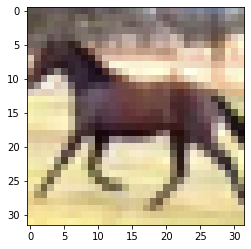

In [8]:
pplt.imshow(images_list[1405])

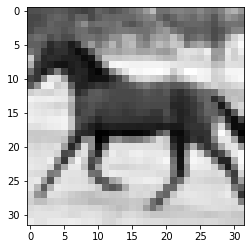

In [9]:
pplt.imshow(inverted_images_list[1405], cmap="gray")

In [10]:
print(images_list[1405][0])

[[ 91  85  80]
 [ 95  84  83]
 [104  87  89]
 [103  88  92]
 [108  93  99]
 [101  90  93]
 [ 88  82  81]
 [ 86  76  78]
 [ 82  67  73]
 [ 89  77  81]
 [110 103 106]
 [103  95 101]
 [ 93  85  84]
 [ 99  96  93]
 [111 106 106]
 [123 119 118]
 [132 132 132]
 [154 157 160]
 [187 186 192]
 [123 115 122]
 [129 114 121]
 [143 126 133]
 [140 130 143]
 [127 126 142]
 [123 126 142]
 [132 139 156]
 [114 124 142]
 [108 116 139]
 [126 133 155]
 [163 169 178]
 [175 179 188]
 [153 153 160]]


In [11]:
print(inverted_images_list[1405][0])

[ 86.2149  87.1655  92.3006  92.9307  98.1582  93.6209  83.6712  79.2094
  72.1608  81.0351 105.424   98.0657  87.2687  96.5451 107.4839 120.0697
 131.9868 156.4296 186.9643 118.1777 119.2701 131.8667 134.458  128.1103
 126.9147 138.8318 123.0506 116.2192 133.4024 168.2157 178.8125 153.7827]


In [12]:
flat_images = [list(chain.from_iterable(image)) for image in inverted_images_list]
flat_data_frame = pd.DataFrame(flat_images)

In [13]:
flat_data_frame

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,33.3602,33.9410,41.0497,75.4608,76.3467,43.2729,41.9571,56.1298,69.7325,77.1833,...,119.9004,113.3032,136.6922,140.8659,131.4108,149.7680,152.5828,127.6114,125.7256,123.3129
1,123.9615,102.5400,92.7798,99.3384,100.7404,136.3239,171.0215,170.3205,142.5082,92.8014,...,107.3428,108.1578,109.9018,112.0156,113.7704,115.9982,117.9980,120.7697,120.4107,120.9376
2,147.2348,171.4128,168.7784,172.6595,200.7384,212.2795,196.1052,135.0880,119.2252,133.2669,...,155.4702,151.6232,124.9849,75.6244,69.5864,122.7446,134.2875,131.9842,132.6852,134.7497
3,203.0406,200.2258,200.2258,201.2257,200.9268,201.3397,202.2256,202.2256,201.9375,201.9375,...,152.5182,148.1057,145.2200,145.9210,145.5081,144.7362,138.6058,138.5996,139.6596,137.6660
4,104.9850,135.1408,144.5159,129.9887,81.9487,55.4675,48.1092,51.9239,52.0379,53.1518,...,70.0452,69.8711,64.9856,62.0999,63.9426,58.0033,54.8788,48.4665,47.8903,50.4879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,161.8006,82.6146,104.2211,107.4704,104.2966,103.8406,108.3949,118.5896,126.0619,130.2464,...,238.7157,238.7157,238.7157,238.7157,238.7157,238.7157,238.7157,236.0041,226.7277,253.9746
9996,3.9996,3.9996,4.9995,0.0000,65.4360,174.2267,166.7759,153.7556,153.0716,150.1859,...,51.9966,64.8382,84.7284,74.8973,49.1432,22.7374,7.2443,12.4718,10.9989,2.9997
9997,40.9959,38.7681,38.6541,39.8389,41.7247,41.8387,43.8385,45.8383,46.9522,48.3650,...,58.8434,58.6154,59.0283,60.8001,61.0281,61.9140,62.7999,61.8000,62.3978,65.1695
9998,31.6719,31.5687,29.9387,31.0095,33.2759,36.9335,37.6884,41.3722,87.6880,146.9377,...,184.1393,121.9069,147.0075,178.1289,217.7674,224.1967,215.7461,225.0872,232.7058,217.7998


In [14]:
# number of train images: 8500
# number of test images: 1500

test_data_frame = flat_data_frame[:1500]
train_data_frame = flat_data_frame[1500:]

test_images_list = inverted_images_list[:1500]
train_images_list = inverted_images_list[1500:]

test_labels = labels_data_frame[:1500]
train_labels = labels_data_frame[1500:]

print(len(test_labels)," ",len(test_images_list)," ",len(test_data_frame))


1500   1500   1500


In [15]:
train_data_frame

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
1500,54.1674,73.9678,73.7615,78.7116,82.1736,78.1267,76.5225,82.4661,66.4264,73.8645,...,42.9961,40.9575,39.3491,41.8542,41.7510,45.1207,47.0603,41.5768,37.5341,39.5447
1501,140.4699,152.7676,151.7677,137.7691,142.5298,152.4040,158.0444,162.7558,150.5999,137.5581,...,205.1519,205.1519,205.1519,204.1520,202.1630,201.1631,202.1630,202.0490,201.0491,199.8643
1502,67.6205,68.4355,79.8274,62.3159,58.4411,72.3489,77.1096,71.7511,67.1106,65.9797,...,114.2664,113.4514,115.4620,111.7721,103.8869,104.1149,113.9999,115.0168,98.2834,105.8975
1503,2.8148,2.9288,2.9288,3.0428,3.1568,4.2707,4.2707,3.2708,5.2706,12.7537,...,17.9614,17.9614,17.9614,17.2496,16.6626,15.7767,15.4177,13.3470,8.9668,4.2985
1504,34.0442,34.0442,34.0442,34.0550,34.7668,33.7669,34.7668,35.7667,35.8807,37.8805,...,151.5073,150.0236,148.6539,147.0562,146.0563,148.0561,153.0556,158.9841,164.9835,169.9830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,161.8006,82.6146,104.2211,107.4704,104.2966,103.8406,108.3949,118.5896,126.0619,130.2464,...,238.7157,238.7157,238.7157,238.7157,238.7157,238.7157,238.7157,236.0041,226.7277,253.9746
9996,3.9996,3.9996,4.9995,0.0000,65.4360,174.2267,166.7759,153.7556,153.0716,150.1859,...,51.9966,64.8382,84.7284,74.8973,49.1432,22.7374,7.2443,12.4718,10.9989,2.9997
9997,40.9959,38.7681,38.6541,39.8389,41.7247,41.8387,43.8385,45.8383,46.9522,48.3650,...,58.8434,58.6154,59.0283,60.8001,61.0281,61.9140,62.7999,61.8000,62.3978,65.1695
9998,31.6719,31.5687,29.9387,31.0095,33.2759,36.9335,37.6884,41.3722,87.6880,146.9377,...,184.1393,121.9069,147.0075,178.1289,217.7674,224.1967,215.7461,225.0872,232.7058,217.7998


In [16]:
train_images_list

[array([[54.1674, 73.9678, 73.7615, ..., 65.3062, 63.7795, 62.0076],
        [53.0857, 71.5164, 71.3487, ..., 67.9039, 68.893 , 63.3494],
        [61.6442, 70.1961, 72.0282, ..., 70.5553, 70.5768, 66.7018],
        ...,
        [41.093 , 42.6154, 44.6582, ..., 29.3778, 36.203 , 33.8612],
        [42.2068, 40.8543, 40.9081, ..., 34.3064, 37.3169, 38.6157],
        [34.5666, 35.2246, 36.2783, ..., 41.5768, 37.5341, 39.5447]]),
 array([[140.4699, 152.7676, 151.7677, ..., 137.0188, 139.5455, 145.246 ],
        [141.7687, 154.7674, 153.7675, ..., 139.3175, 141.5453, 146.2459],
        [141.7687, 153.7675, 153.7675, ..., 138.9046, 140.5454, 145.246 ],
        ...,
        [188.9624, 190.7342, 191.6201, ..., 198.9569, 195.5443, 191.3706],
        [189.9623, 191.7341, 192.62  , ..., 207.0377, 206.0378, 205.4508],
        [185.9627, 186.7346, 188.6204, ..., 202.049 , 201.0491, 199.8643]]),
 array([[ 67.6205,  68.4355,  79.8274, ..., 166.0417, 167.4545, 169.0522],
        [ 82.4358,  79.3051,  7

In [17]:
train_labels

,id,label
1500,7486,cat
1501,7488,cat
1502,7489,horse
1503,7490,cat
1504,7493,cat
...,...,...
9995,49979,horse
9996,49980,cat
9997,49983,cat
9998,49984,cat


Image type is:  cat
Minimum and maximum pixel numbers: **0.0, 254.27349999999998**


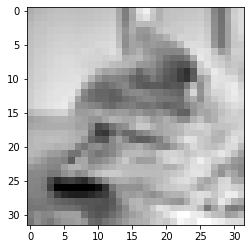

In [18]:
# show a random train data information and content
rand_index = 512

print("Image type is: ", train_labels["label"].values[rand_index])

pplt.imshow(train_images_list[rand_index], cmap="gray")

print("Minimum and maximum pixel numbers: **{}, {}**".format(min(train_data_frame.iloc[rand_index]), max(train_data_frame.iloc[rand_index])))

Image type is:  cat
Minimum and maximum pixel numbers: **19.4172, 254.97449999999998**


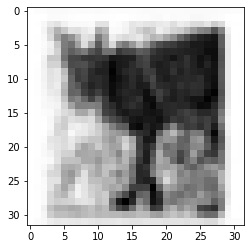

In [19]:
# show a random test data information and content
rand_index = 497

print("Image type is: ", test_labels["label"].values[rand_index])

pplt.imshow(test_images_list[rand_index], cmap="gray")

print("Minimum and maximum pixel numbers: **{}, {}**".format(min(test_data_frame.iloc[rand_index]), max(test_data_frame.iloc[rand_index])))

difference between train = -4
difference between test = 4


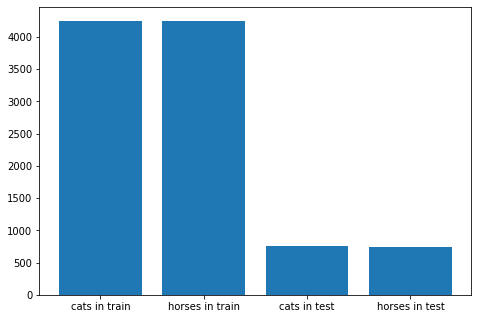

In [20]:
figure = pplt.figure()
axis = figure.add_axes([0,0,1,1])
names = ['cats in train','horses in train','cats in test','horses in test']

numbers = [train_labels['label'].value_counts()['cat'], train_labels['label'].value_counts()['horse'], test_labels['label'].value_counts()['cat'], test_labels['label'].value_counts()['horse']]

print("difference between train = {}".format(train_labels['label'].value_counts()['cat']-train_labels['label'].value_counts()['horse']))
print("difference between test = {}".format(test_labels['label'].value_counts()['cat']-test_labels['label'].value_counts()['horse']))

axis.bar(names, numbers)
pplt.show()

In [21]:
# normalize train data
print(train_data_frame)

temp_data_frame = train_data_frame.copy()
temp_column = temp_data_frame.columns

for column in temp_column:
    temp_data_frame[column] = (train_data_frame[column]-min(train_data_frame[column])) / (max(train_data_frame[column])-min(train_data_frame[column]))

train_data_frame = temp_data_frame

print(train_data_frame)

          0         1         2         3         4         5         6     \
1500   54.1674   73.9678   73.7615   78.7116   82.1736   78.1267   76.5225   
1501  140.4699  152.7676  151.7677  137.7691  142.5298  152.4040  158.0444   
1502   67.6205   68.4355   79.8274   62.3159   58.4411   72.3489   77.1096   
1503    2.8148    2.9288    2.9288    3.0428    3.1568    4.2707    4.2707   
1504   34.0442   34.0442   34.0442   34.0550   34.7668   33.7669   34.7668   
...        ...       ...       ...       ...       ...       ...       ...   
9995  161.8006   82.6146  104.2211  107.4704  104.2966  103.8406  108.3949   
9996    3.9996    3.9996    4.9995    0.0000   65.4360  174.2267  166.7759   
9997   40.9959   38.7681   38.6541   39.8389   41.7247   41.8387   43.8385   
9998   31.6719   31.5687   29.9387   31.0095   33.2759   36.9335   37.6884   
9999  140.5443  141.4302  142.3161  142.3161  142.7290  143.1419  143.7289   

          7         8         9     ...      1014      1015    

In [22]:
# normalize test data
print(test_data_frame)

temp_data_frame = test_data_frame.copy()
temp_column = temp_data_frame.columns

for column in temp_column:
    temp_data_frame[column] = (test_data_frame[column]-min(test_data_frame[column])) / (max(test_data_frame[column])-min(test_data_frame[column]))

test_data_frame = temp_data_frame

print(train_data_frame)

          0         1         2         3         4         5         6     \
0      33.3602   33.9410   41.0497   75.4608   76.3467   43.2729   41.9571   
1     123.9615  102.5400   92.7798   99.3384  100.7404  136.3239  171.0215   
2     147.2348  171.4128  168.7784  172.6595  200.7384  212.2795  196.1052   
3     203.0406  200.2258  200.2258  201.2257  200.9268  201.3397  202.2256   
4     104.9850  135.1408  144.5159  129.9887   81.9487   55.4675   48.1092   
...        ...       ...       ...       ...       ...       ...       ...   
1495  198.4531  200.0292  190.5571  187.6606  184.9490  173.4170  180.4639   
1496  156.0354  155.4098  150.3717  155.4035  157.2184  155.1046  150.4363   
1497  105.8108   71.0423   75.2268   37.0134   55.2396   67.8793   44.1097   
1498  186.7353  176.5083  195.9794  200.8649  203.5226  201.4088  197.5771   
1499  150.1025  147.8038  146.1029  151.1024  153.5860  150.8852  151.8851   

          7         8         9     ...      1014      1015    

# Dataloader

In [5]:
class Dataloader:
    '''
    This class prepares the dataset for the neural network.
    '''
    
    def __init__(self, data, labels, n_classes, batch_size=None, shuffle=False):
        '''
        This is the constructor. It gets dataset information and initializes the 
        Dataloader class fields.
            Parameters:
                data: features your dataset in pandas.Dataframe format.
                labels: labels of your dataset in pandas.Dataframe format.
                n_classes: number of classes you have in your dataset.
                batch_size: the number of samples that will be propagated through the network.
                shuffle: boolean value indicating whether or not the dataset should be shuffled
        '''

        assert len(data)==len(labels)
        self.__n_classes = n_classes
        self.__batch_size = batch_size
        self.__shuffle = shuffle
        self.__data = data
        self.__onehot_labels = self.__onehot(labels, self.__n_classes)
    
    def __onehot(self, labels, n_classes):
        '''
        This private method gets labels and provides one_hot vectors of labels.
        For categorical variables where no such ordinal relationship exists,
        the integer encoding is not enough.
        In this case, a one-hot encoding can be applied to the integer representation.
        This is where the integer encoded variable is removed, and a new binary variable is
        added for each unique integer value.
        example:
            red,    green,    blue
            1,      0,        0
            0,      1,        0
            0,      0,        1
                Parameters:
                        label: lables of your dataset in pandas.Dataframe format.
                        n_classes: number of classes you have in your dataset.
                
                Returns:
                    onehot_vectors: onehot vectors of the labels
        '''
        # TODO: Implement
        onehot_vectors = []
        for label in labels:
            row = [0] * n_classes
            if label == "horse":
                row[1] = 1
            else:
                row[0] = 1
            onehot_vectors.append(row)
        return onehot_vectors
    
    def __shuffle_dataset(self):
        '''
        This private method shuffles your dataset.
        It uses data and onehot_labels to shuffle them
        symmetrical.
        '''
        # TODO: Implement
    
    def __iter__(self):
        '''
        The __iter__() function returns an iterator for the
        given object (array, set, tuple, etc., or custom objects).
        This will return your dataset in the batch_size given. This should
        be used to provide data for the neural network.
        '''
        
        if self.__shuffle:
            self.__shuffle_dataset()
            
        if self.__batch_size==None:
            yield (np.matrix(self.__data), np.matrix(self.__onehot_labels))
            return
            
        for idx in range(0, len(self.__data), self.__batch_size):
            yield (np.matrix(self.__data[idx:idx+self.__batch_size]), 
                   np.matrix(self.__onehot_labels[idx:idx+self.__batch_size]))

# Activation Functions

In [6]:
from copy import deepcopy

class Identical:
    '''
    This is the Identical activation function. This activation function just
    return the value it gets.
    '''
    
    def __init__(self): 
        pass
        '''
        This is the constructor. It does not have any fields
        as a result, there is no need to do anything in the constructor.
        '''
    
    def __val(self, matrix):
        '''
        This private method gets a matrix and uses the activity function on that.
        As this is an identical activity function, it just 
        returns np.matrix of the input.
        
            Parameters:
                matrix: np.matrix of values
            Returns:
                identical_value: np.matrix of input with float datatypes
        '''
        identical_value = np.matrix(matrix, dtype=float)
        return identical_value

    def derivative(self, matrix):
        '''
        This method returns the derivation of the input.
        As the derivation of x is one, this method returns
        a matrix of one with the shape of the input matrix.
        
            Parameters:
                matrix: np.matrix of values
            Returns:
                identical_derivative: np.matrix of ones with matrix shape
        '''
        temp = np.matrix(matrix, dtype=float)
        identical_derivative = np.matrix(np.full(np.shape(temp), 1.))
        return identical_derivative
    
    def __call__(self, matrix):
        '''
        __call__ is a special function in Python that, when implemented inside a class,
        gives its instances (objects) the ability to behave like a function.
        Here we return the _value method output.
            
            Parameters:
                matrix: np.matrix of values
            Returns:
                __val(matrix): __val return value for the input matrix
        '''
        return self.__val(matrix)
    

class Relu:
    '''
    This is the Relu activation function. 
    The rectified linear activation function or ReLU for short
    is a piecewise linear function that will output the input directly
    if it is positive, otherwise, it will output zero.
    '''
    
    def __init__(self): 
        pass
        '''
        This is the constructor. It does not have any fields
        as a result, there is no need to do anything in the constructor.
        '''
    
    def __val(self, matrix):
        '''
        This private method gets a matrix and uses the activity function on that.
        It will set 0 in the matrix if the value is less than 0 else, it returns the value itself.
        
            Parameters:
                matrix: np.matrix of values
            Returns:
                relu_value: np.matrix of relu activation function result
        '''
        relu_value = np.array(matrix, dtype=float)
        relu_value[relu_value < 0] = 0
        return relu_value

    def derivative(self, matrix):
        '''
        Returns the derivation value of relu function on input matrix.
        
            Parameters:
                matrix: np.matrix of values
            Returns:
                relu_derivative: np.matrix of relu activation function derivation result
        '''
        relu_derivative = np.array([np.array(x, copy=True) for x in matrix])
        relu_derivative[relu_derivative < 0] = 0
        relu_derivative[relu_derivative > 0] = 1
        return relu_derivative
    
    def __call__(self, matrix):
        '''
        __call__ is a special function in Python that, when implemented inside a class,
        gives its instances (objects) the ability to behave like a function.
        Here we return the _relu method output.
            
            Parameters:
                matrix: np.matrix of values
            Returns:
                __relu(matrix): __relu return value for the input matrix
        '''
        return self.__val(matrix)

    
class LeakyRelu:
    '''
    This is the Leaky Relu activation function. 
    Leaky Rectified Linear Unit, or Leaky ReLU,
    is a type of activation function based on a ReLU,
    but it has a small slope for negative values instead
    of a flat slope.
    '''
    
    def __init__(self, negative_slope=0.01):
        '''
        This is the constructor.
        It sets negative_slope field.
            Parameters:
                negative_slope: slope for negative input values
        '''
        self.negative_slope = 0.01
    
    def __val(self, matrix):
        '''
        This private method gets a matrix and uses the activity function on that.
        It will set negative_slope*value in the matrix if the value is less than 0, else it
        returns the value itself.
        
            Parameters:
                matrix: np.matrix of values
            Returns:
                relu_value: np.matrix of relu activation function result
        '''
        leacky_relu_value = np.array([np.array(x, copy=True) for x in matrix])
        return np.where(leacky_relu_value > 0, leacky_relu_value, leacky_relu_value * 0.01)       


    def derivative(self, matrix):
        '''
        Returns the derivation value of leaky relu function on input matrix.
        
            Parameters:
                matrix: np.matrix of values
            Returns:
                leacky_relu_derivative: np.matrix of leaky relu activation function derivation result
        '''
        leacky_relu_derivative = np.array(matrix, dtype=float)
        leacky_relu_derivative[leacky_relu_derivative > 0] = 1
        leacky_relu_derivative[leacky_relu_derivative < 0] = 0.01
        return leacky_relu_derivative
    
    def __call__(self, matrix):
        '''
        __call__ is a special function in Python that, when implemented inside a class,
        gives its instances (objects) the ability to behave like a function.
        Here we return the _val method output.
            
            Parameters:
                matrix: np.matrix of values
            Returns:
                __val(matrix): __val return value for the input matrix
        '''
        return self.__val(matrix)

    
class Sigmoid:
    '''
    A sigmoid function is a mathematical function having a
    characteristic "S"-shaped curve or sigmoid curve.
    It return S(x)=1/(1+e^-x)
    '''
    
    def __init__(self): 
        pass

    def __val(self, matrix):
        '''
        Returns 1/(1+e^-x) of values
        
            Parameters:
                matrix: np.matrix of values
            Returns:
                sigmoid_value: np.matrix of relu activation function result
        '''
        return 1.0 / (1.0 + np.exp(-matrix))

    def derivative(self, matrix):
        '''
        Returns the derivation value of sigmoid function on input matrix.
        
            Parameters:
                matrix: np.matrix of values
            Returns:
                sigmoid_derivative: np.matrix of sigmoid activation function derivation result
        '''
        return np.multiply(self.__val(matrix), 1-self.__val(matrix))
    
    def __call__(self, matrix):
        '''
        __call__ is a special function in Python that, when implemented inside a class,
        gives its instances (objects) the ability to behave like a function.
        Here we return the _val method output.
            
            Parameters:
                matrix: np.matrix of values
            Returns:
                __val(matrix): __val return value for the input matrix
        '''
        return self.__val(matrix)


class Softmax:
    '''
    The softmax function, also known as softargmax  or normalized
    exponential function is a generalization of the logistic
    function to multiple dimensions. It is used in multinomial logistic
    regression and is often used as the last activation function of a neural
    network to normalize the output of a network to a probability distribution
    over predicted output classes, based on Luce's choice axiom.
    Softmax return (e^x_i / (Σe^x_j for j = 1, ..., J))
    '''
        
    def __init__(self): 
        pass
        '''
        This is the constructor. It does not have any fields
        as a result, there is no need to do anything in the constructor.
        '''

    def __val(self, matrix):
        '''
        This private method gets a matrix and uses the softmax on that.
        Softmax return (e^x_i / (Σe^x_j for j = 1, ..., J))
        
            Parameters:
                matrix: np.matrix of values
            Returns:
                relu_value: np.matrix of relu activation function result
        '''
        value = np.zeros(matrix.shape)
        for i in range(len(matrix)):
            value[i] = np.exp(matrix[i] - np.max(matrix[i]))
            value[i] = value[i] / np.sum(value[i])
        return value
    
    def __call__(self, matrix):
        '''
        __call__ is a special function in Python that, when implemented inside a class,
        gives its instances (objects) the ability to behave like a function.
        Here we return the _val method output.
            
            Parameters:
                matrix: np.matrix of values
            Returns:
                __val(matrix): __val return value for the input matrix
        '''
        return self.__val(matrix)
    
class Tanh:
    
    def __init__(self): 
        pass
          
        
    def __val(self, matrix):
        '''
        This private method gets a matrix and uses the activity function on that.
        It performs Tanh on the values.
        
            Parameters:
                matrix: np.matrix of values
            Returns:
                tanh_value: np.matrix of Tanh activation function result
        '''
        return np.tanh(matrix)

    def derivative(self, matrix):
        '''
        Returns the derivation value of Tanh function on input matrix.
        
            Parameters:
                matrix: np.matrix of values
            Returns:
                sigmoid_derivative: np.matrix of Tanh activation function derivation result
        '''
        return 1 - np.multiply(matrix, matrix)
    
    def __call__(self, matrix):
        '''
        __call__ is a special function in Python that, when implemented inside a class,
        gives its instances (objects) the ability to behave like a function.
        Here we return the _val method output.
            
            Parameters:
                matrix: np.matrix of values
            Returns:
                __val(matrix): __val return value for the input matrix
        '''
        return self.__val(matrix)

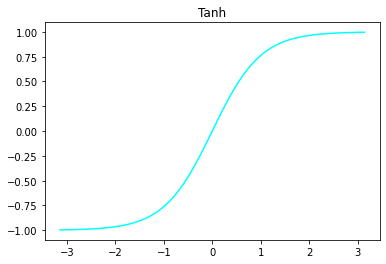

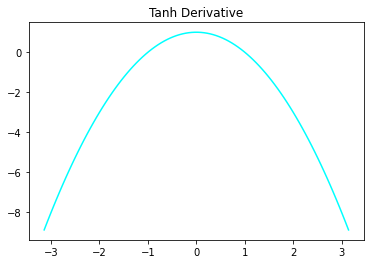

In [7]:
# check Tanh activation and its derivative
test_span = np.linspace(-np.pi, np.pi, 100)
function = Tanh()
diagram = function(test_span)

pplt.plot(test_span, diagram, color = 'cyan')
pplt.title("Tanh")
pplt.show()


diagram = function.derivative(test_span)

pplt.plot(test_span, diagram, color = 'cyan')
pplt.title("Tanh Derivative")
pplt.show()


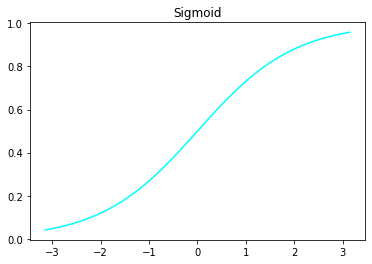

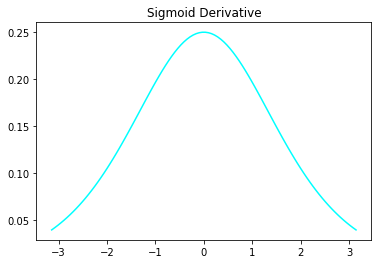

In [8]:
# check Sigmoid activation and its derivative
test_span = np.linspace(-np.pi, np.pi, 100)
function = Sigmoid()
diagram = function(test_span)

pplt.plot(test_span, diagram, color = 'cyan')
pplt.title("Sigmoid")
pplt.show()


diagram = function.derivative(test_span)

pplt.plot(test_span, diagram, color = 'cyan')
pplt.title("Sigmoid Derivative")
pplt.show()


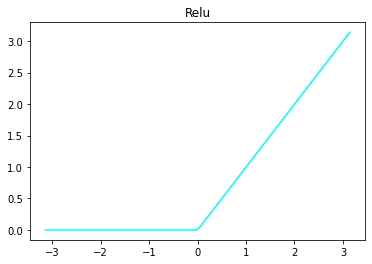

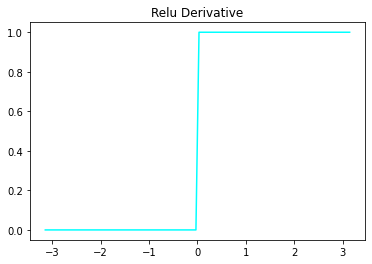

In [9]:
# check Relu activation and its derivative
test_span = np.linspace(-np.pi, np.pi, 100)
function = Relu()
diagram = function(test_span)

pplt.plot(test_span, diagram, color = 'cyan')
pplt.title("Relu")
pplt.show()


diagram = function.derivative(test_span)

pplt.plot(test_span, diagram, color = 'cyan')
pplt.title("Relu Derivative")
pplt.show()


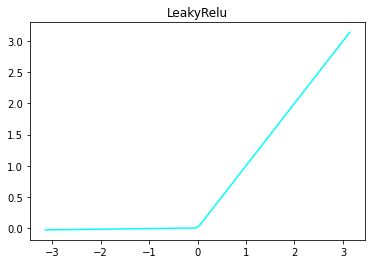

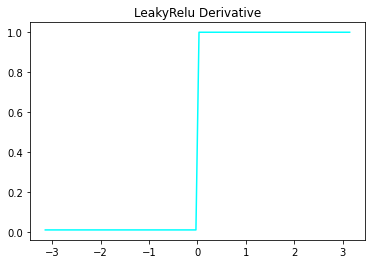

In [11]:
# check LeakyRelu activation and its derivative
test_span = np.linspace(-np.pi, np.pi, 100)
function = LeakyRelu()
diagram = function(test_span)

pplt.plot(test_span, diagram, color = 'cyan')
pplt.title("LeakyRelu")
pplt.show()


diagram = function.derivative(test_span)

pplt.plot(test_span, diagram, color = 'cyan')
pplt.title("LeakyRelu Derivative")
pplt.show()


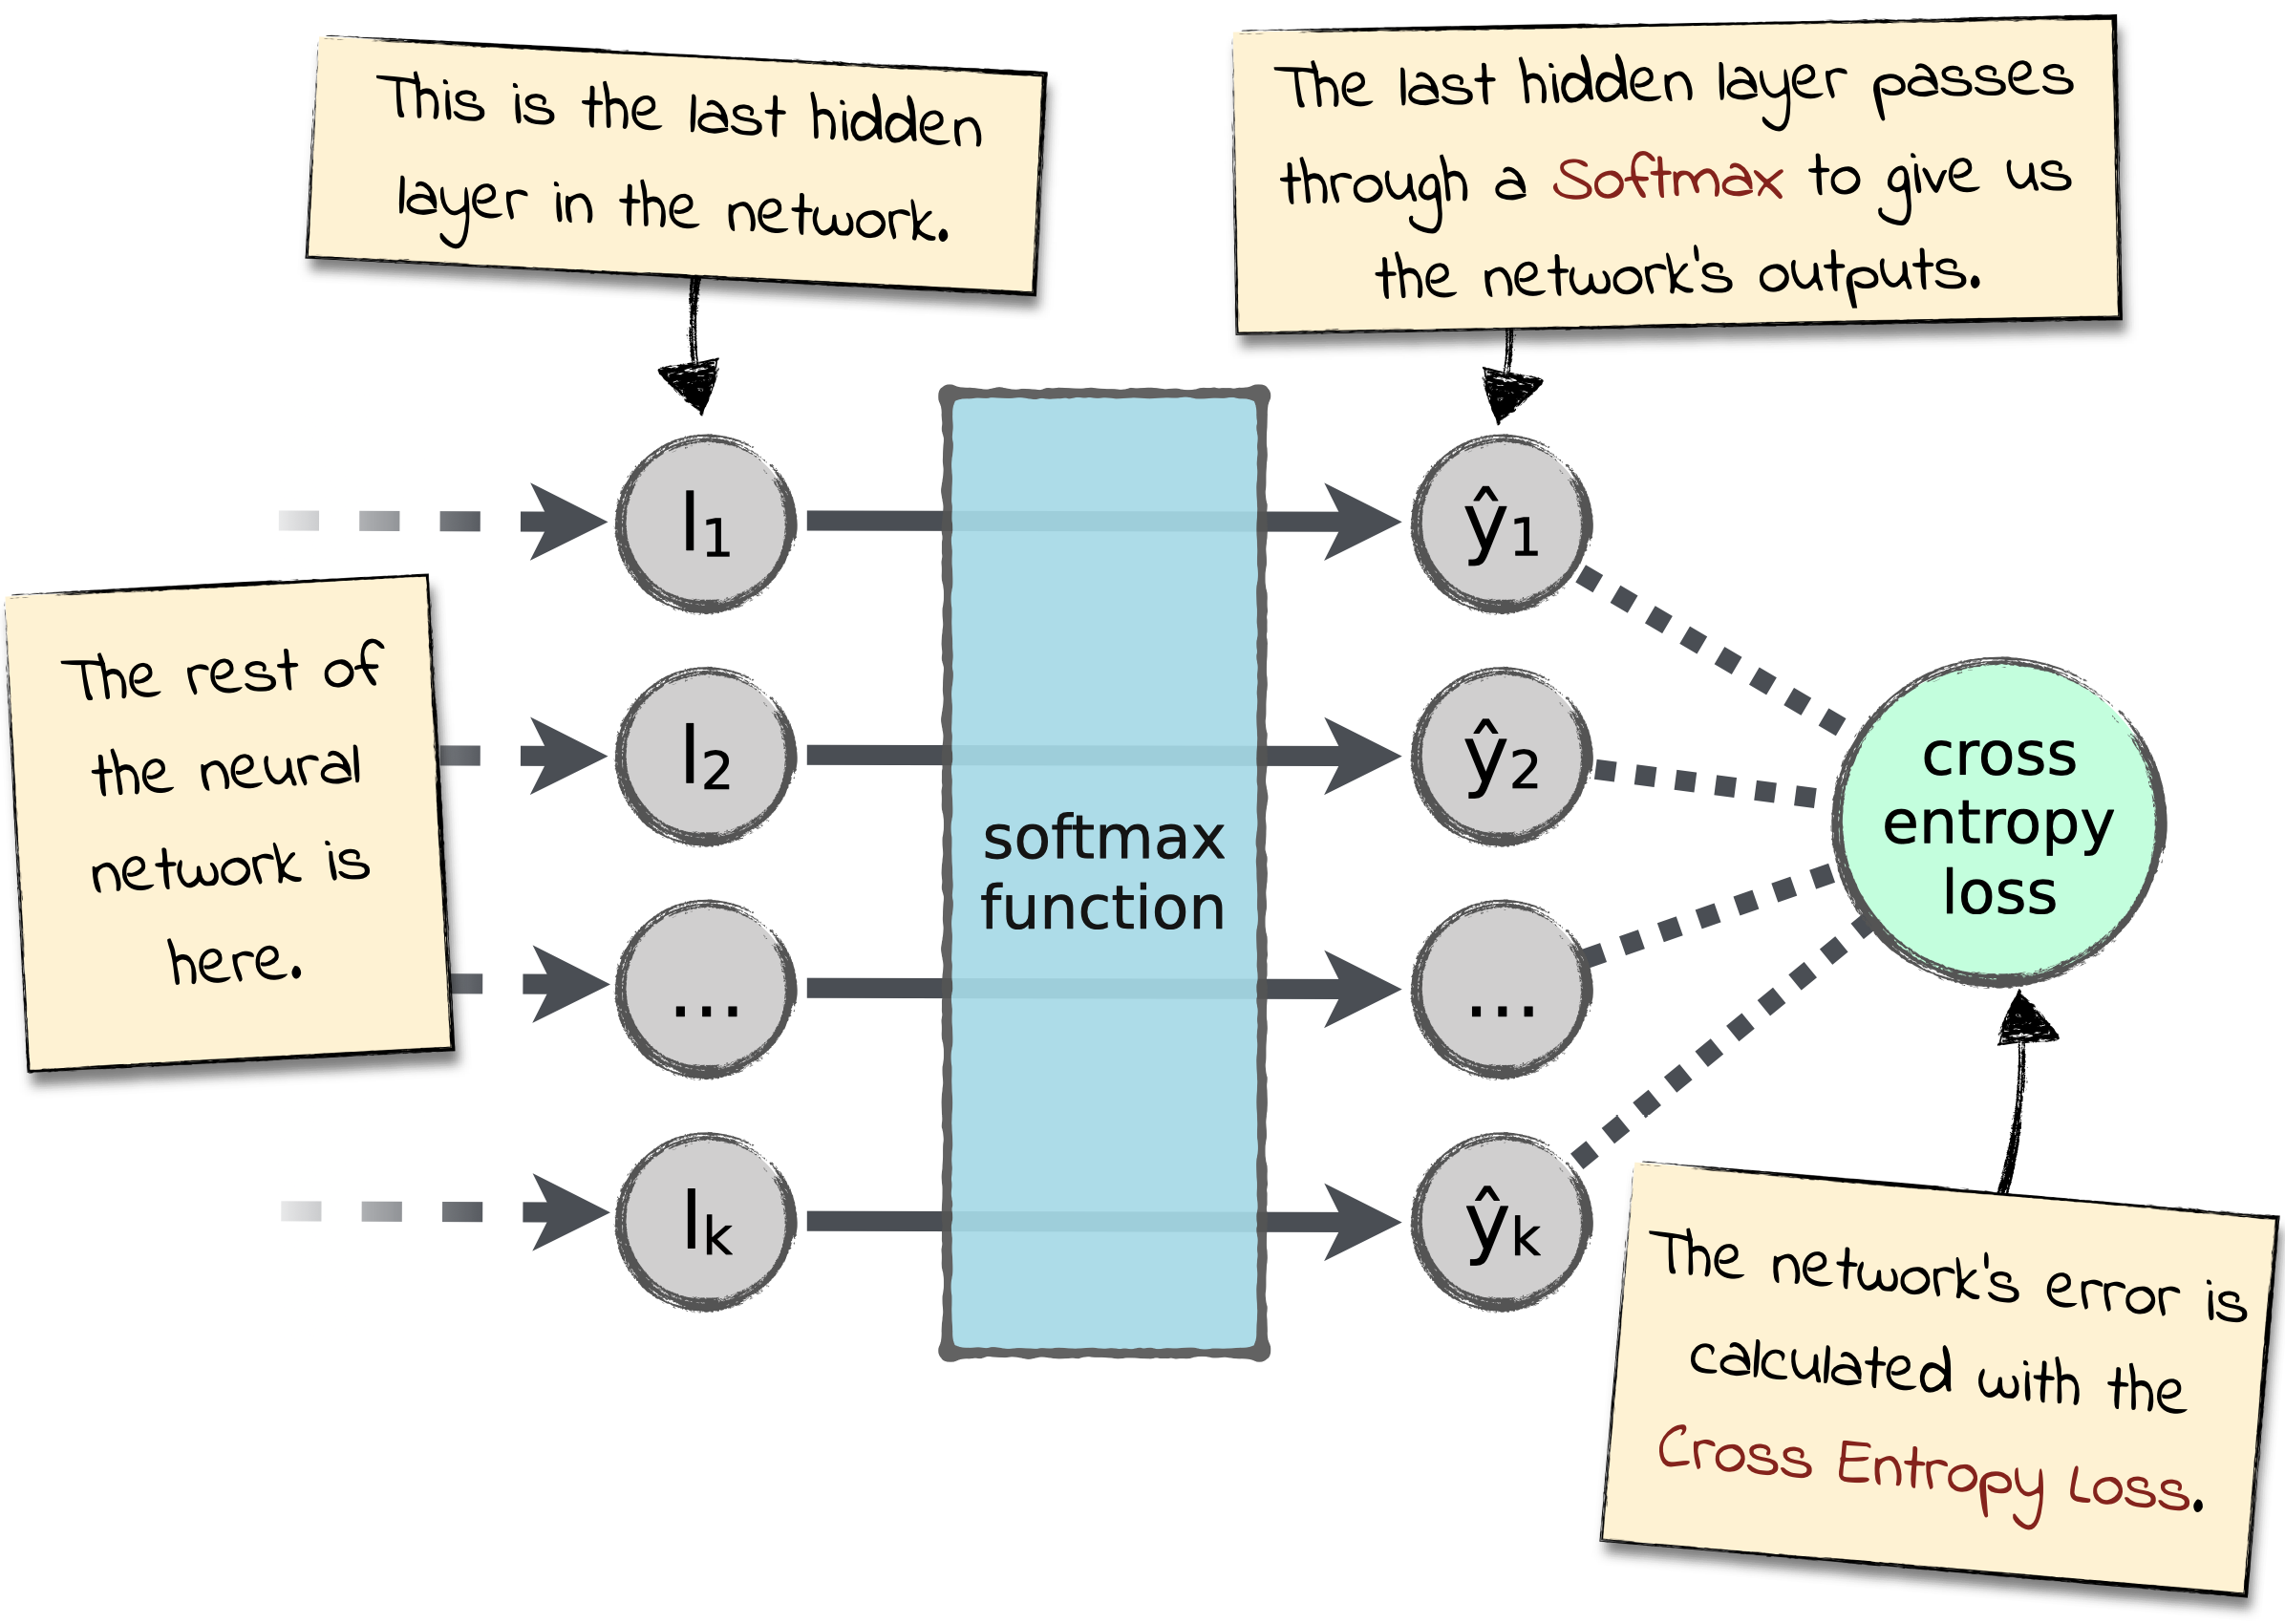

# Loss Function

In [29]:
class CrossEntropy: #(with softmax)
    '''
    Cross-entropy is a measure of the difference between two probability
    distributions for a given random variable or set of events. You might
    recall that information quantifies the number of bits required to encode
    and transmit an event.
    The above image can help you.
    '''
    EPSILON = 1e-45
    
    def __init__(self): 
        pass
        '''
        This is the constructor. It does not have any fields
        as a result, there is no need to do anything in the constructor.
        '''

    def __val(self, true_val, expected_val):
        '''
        L(y^, y) = - Σ (y^(k)log (y^)^(k)) for k in K
        Parameters:
            true_val: calculated values (generated by neural network)
            expected_val: real values in dataset
        Returns:
            cross_entropy_value: cross entropy of inputs
        '''
        assert np.shape(true_val)==np.shape(expected_val)
        function = Softmax()
        
        softmax_log_value = np.log(np.clip(function(true_val), self.EPSILON, 1 - self.EPSILON))
        cross_entropy_value = np.multiply(-expected_val, softmax_log_value).sum(axis = 1)
        
        return cross_entropy_value
        
    def derivative(self, true_val, expected_val):
        '''
        Returns derivation of cross entropy.
            Parameters:
                true_val: calculated values (generated by neural network)
                expected_val: real values in dataset
            Returns:
                cross_entropy_derivative: cross entropy derivation of inputs
        '''
        assert np.shape(true_val)==np.shape(expected_val)
        function = Softmax()
        
        cross_entropy_derivative = function(true_val + self.EPSILON) - expected_val
        return cross_entropy_derivative
    
    def __call__(self, true_val, expected_val):
        '''
        __call__ is a special function in Python that, when implemented inside a class,
        gives its instances (objects) the ability to behave like a function.
        Here we return the _val method output.
            
            Parameters:
                true_val: calculated values (generated by neural network)
                expected_val: real values in dataset
            Returns:
                __val(matrix): __val return value for the input matrix
        '''
        return self.__val(true_val, expected_val)

# Layer

In [95]:
sys.setrecursionlimit(500000)

class Layer:
    '''
    The layer class is used to define neural network layers.
    It stores all needed information for each layer, such as neurons count,
    weight matrix, bias, the output after applying the activation function, etc.
    '''

    DEFAULT_LOW, DEFAULT_HIGH, DEFAULT_MEAN, DEFAULT_VAR = 0, 0.05, 0., 1.
  
    def __init__(self, input_size, output_size, activation=Identical(), initial_weight='uniform', 
                 **initializing_parameters):
        '''
        Parameters:
            input_size: the size of the input of this layer.
            output_size: the size of the output after this layer.
            activation: the activation function. It can be initialized to either of the previously defined activation classes.
                               default is an Identical activation function.
            initial_weight: either normal or uniform. It defines the method for weight initialization.
        '''
        
        assert type(initial_weight)==str, 'Undefined activation function!'
        
        self.__weight_initializer_dict = {'uniform':self.__uniform_weight, 'normal':self.__normal_weight}
        
        assert initial_weight in self.__weight_initializer_dict, 'Undefined weight initialization function!'


        self.__n_neurons = output_size
        weight_initializer = self.__weight_initializer_dict[initial_weight]
        self.__weight = weight_initializer(input_size, self.__n_neurons, **initializing_parameters)
        self.__bias = weight_initializer(1, self.__n_neurons, **initializing_parameters)
        self.__activation = activation
        
        self.__last_input = None
        self.__last_activation_input = None
        self.__last_activation_output = None
        self.__last_activation_derivative = None
        
    def forward(self, layer_input):
        '''
        It calculates the output of this layer for the layer_input argument.
        This method also stores __last_input, __last_activation_input, and __last_activation_derivative
        for future use in backpropagation.
        Parameters:
            layer_input: 2d np.matrix representing the input matrix of this layer.
        Returns:
            Final output of this layer after applying the activation function.
        '''
        
        # TODO: Implement
        
        assert np.ndim(layer_input)==2
        assert np.size(self.__weight,0) == np.size(layer_input,1)
        
        self.__last_input = layer_input
        self.__last_activation_input =  layer_input @ self.weight + self.bias
        self.__last_activation_output = self.activation(self.__last_activation_input)
        self.__last_activation_derivative = np.squeeze(self.activation.derivative(self.__last_activation_input))
        
        return self.__last_activation_output
    
    def update_weights(self, backprop_tensor, lr):
        '''
        It updates Layer weights according to the backpropagation matrix and learning rate.
        This method updates bias values as well.
        Parameters:
            backprop_tensor: 2d np.matrix passed from the next layer containing gradient values.
            lr: learning rate
        Returns:
            backprop_tensor to be used by the previous layer.
        '''
        assert np.ndim(backprop_tensor)==2
        assert np.size(backprop_tensor,0) == np.size(self.__last_activation_derivative,0)
        assert np.size(backprop_tensor,1) == self.__n_neurons
        
        transpose_input_matrix = self.__last_input.transpose()
        
        backprop_mult = np.multiply(backprop_tensor, self.__last_activation_derivative)
        backprop_matrix = np.matrix(np.tile(1, (1, backprop_mult.shape[0])))
        
        weight_product = np.matmul(transpose_input_matrix, backprop_mult)
        backprop_product = np.matmul(backprop_matrix, backprop_mult)
        
        backprop_tensor = np.matmul(backprop_mult, self.__weight.transpose())
        
        self.__weight -= weight_product * lr
        self.__bias -= backprop_product * lr
        
        return backprop_tensor

    def __uniform_weight(self, dim1, dim2, **initializing_parameters):
        '''
        Initializes weights as a uniform distribution between low and high values.
        It uses default low and high values unless low or high are passed in initializing_parameters.
        Parameters:
            dim1: the size of the first dimension of weights.
            dim2: the size of the second dimension of weights.
            initializing_parameters: other initializing parameters; it can include custom low or high values.
        Returns:
            np.matrix with size (dim1, dim2) initialized using uniformly distributed values.
        '''
        low, high = self.DEFAULT_LOW, self.DEFAULT_HIGH
        if 'low' in initializing_parameters.keys(): low = initializing_parameters['low']
        if 'high' in initializing_parameters.keys(): high = initializing_parameters['high']
        
        
        return np.random.uniform(low = low, high = high, size = (dim1, dim2))

    def __normal_weight(self, dim1, dim2, **initializing_parameters):
        '''
        Initializes weights as a normal distribution with mean and var values.
        It uses default mean and variance values unless mean or var are passed in initializing_parameters.
        Parameters:
            dim1: the size of the first dimension of weights.
            dim2: the size of the second dimension of weights.
            initializing_parameters: other initializing parameters; it can include custom mean or var values.
        Returns:
            np.matrix with size (dim1, dim2) initialized using normaly distributed values.
        ''' 
        mean, var = self.DEFAULT_MEAN, self.DEFAULT_VAR
        if 'mean' in initializing_parameters.keys(): mean = initializing_parameters['mean']
        if 'var' in initializing_parameters.keys(): var = initializing_parameters['var']
            
            
        return np.random.normal(loc = mean, scale = math.sqrt(var), size=(dim1, dim2))
    
    @property
    def n_neurons(self): return self.__n_neurons
    
    @property
    def weight(self): return self.__weight
    
    @property
    def bias(self): return self.__bias
    
    @property
    def activation(self): return self.__activation

# Feed Forward Neural Network

In [31]:
class FeedForwardNN:
    '''
    This class is used in order to implement custom feed-forward neural networks.
    The FeedForwardNN class stores a list of layers that determines all network layers.
    It also consists of the learning rate and loss function.
    '''
    def __init__(self, input_shape):
        '''
        Parameters:
            input_shape: the size of the first input to our neural network.
        '''
        
        self.__input_shape = input_shape
        self.__output_shape = None
        
        self.__layers_list = []
        
        self.__lr = None
        self.__loss = None

        
    def add_layer(self, n_neurons, activation=Relu(), initial_weight='uniform', **initializing_parameters):
        '''
         This method adds a new custom layer to the layers_list.
         Parameters:
             n_neurons: number of neurons in this layer
             activation: the activation function of this layer, default is Relu
             initial_weight: either a uniform or normal, default is uniform
             initializing_parameters: other initializing parameters such as low, high, mean, var, etc
        '''
         
        assert type(n_neurons)==int, "Invalid number of neurons for the layer!"
        assert n_neurons>0, "Invalid number of neurons for the layer!"
        
        n_prev_neurons = self.__input_shape if len(self.__layers_list)==0 else self.__layers_list[-1].n_neurons
        new_layer = Layer(n_prev_neurons, n_neurons, activation, initial_weight, **initializing_parameters)
        self.__layers_list.append(new_layer)
        self.__output_shape = self.__layers_list[-1].n_neurons 
      
    
    def set_training_param(self, loss=CrossEntropy(), lr=1e-3):
        '''
        This method is used to set training parameters.
        Parameters:
            loss: loss function, default is CrossEntropy
            lr: learning rate, default is 1e-3
        '''
        assert self.__layers_list, "Uncomplete model!"
        self.__loss = loss
        self.__lr = lr
    
    
    def forward(self, network_input):
        '''
        This method calculates the output of the complete neural network for a passed input.
        Parameters:
            network_input: input of the neural network
        Returns:
            network_output: output of the neural network after forwarding the network_input
        '''
        assert type(self.__output_shape) != None, "Model is not compiled!"
        
        output = deepcopy(network_input)
        
        for layer in self.__layers_list:
            output = layer.forward(output)
            output = np.squeeze(output)
            
        return output
    
    
    def fit(self, epochs, trainloader, testloader=None, print_results=True):
        '''
        This method trains the neural network using specified parameters.
        It runs the __train private method epoch times and fills the log dictionary.
        Parameters:
            epochs: number of epochs to run
            trainloader: DataLoader for train data
            testloader: DataLoader for test data
            print_results: whether or not to print the results
        Returns:
            log: complete log of the training process as a dictionary consisting of
            train_accuracy, train_loss, test_accuracy, test_loss
        '''
        
        assert type(self.__output_shape) != None, "Model is not compiled!"
        assert type(self.__lr) != None and type(self.__loss) != None, "Training paramenters are not set!"

        log = {"train_accuracy":[], "train_loss":[], "test_accuracy":[], "test_loss":[]}
        
        for epoch in range(1, epochs+1):
            
            if print_results: 
                print('Epoch {}:'.format(epoch)) 
                
            average_accuracy, average_loss = self.__train(trainloader)
            log['train_accuracy'].append(average_accuracy)
            log['train_loss'].append(average_loss)
            if print_results:
                print('\tTrain: Average Accuracy: {}\tAverage Loss: {}'.format(average_accuracy, average_loss))
            
            if type(testloader) != type(None):
                average_accuracy, average_loss = self.__test(testloader)
                log['test_accuracy'].append(average_accuracy)
                log['test_loss'].append(average_loss)
                if print_results:
                    print('\tTest: Average Accuracy: {}\tAverage Loss: {}'.format(average_accuracy, average_loss))
                    
        return log
    
    
    def __train(self, trainloader):
        '''
        Trains the neural network for one epoch.
        Parameters:
            trainloader: A DataLoader consisting of train data
        Returns:
            batch_accuracy, batch_loss: mean of all batch_accuracies, batch_losses
        '''
        bach_accuracies, batch_losses = [], []
        for x_train, y_train in trainloader:
            batch_accuracy, batch_loss = self.__train_on_batch(x_train, y_train)
            bach_accuracies.append(batch_accuracy)
            batch_losses.append(batch_loss)
        return np.mean(bach_accuracies), np.mean(batch_losses)
    
    
    def __test(self, testloader):
        '''
        Test the neural network using a testloader.
        Parameters:
            testloader: A DataLoader of test data
        Returns:
            batch_accuracy, batch_loss: mean of all batch_accuracies, batch_losses
        '''
        bach_accuracies, batch_losses = [], []
        for x_test, y_test in testloader:
            batch_accuracy, batch_loss = self.__test_on_batch(x_test, y_test)
            bach_accuracies.append(batch_accuracy)
            batch_losses.append(batch_loss)
        return np.mean(bach_accuracies), np.mean(batch_losses)

    
    def __train_on_batch(self, x_batch, y_batch):
        '''
        Trains the neural network for one batch of train data.
        Parameters:
            x_batch: one batch data
            y_batch: labels for one batch
        Returns:
            (batch_accuracy, batch_average_loss)
        '''
        out_batch = self.forward(x_batch)
        
        batch_accuracy = self.__compute_accuracy(out_batch, y_batch)
        
        batch_average_loss = self.__update_weights(out_batch, y_batch)
        
        
        return (batch_accuracy, batch_average_loss)
        
        
    def __test_on_batch(self, x_batch, y_batch):
        '''
        Tests the neural network for one batch of test data.
        Parameters:
            x_batch: one batch data
            y_batch: labels for one batch
        Returns:
            (batch_accuracy, batch_average_loss)
        '''  
        out_batch = self.forward(x_batch)
        
        cross_entropy = CrossEntropy()
        
        batch_average_loss = np.sum(cross_entropy(out_batch, y_batch)) / len(out_batch)
        
        batch_accuracy = self.__compute_accuracy(out_batch, y_batch)
        
        return (batch_accuracy, batch_average_loss)
            
        
    def __get_labels(self, outputs):
        '''
        Parameters:
            outputs: output of the neural network
        Returns:
            labels: labels generated from the outputs of the neural network
        '''
        labels = np.argmax(outputs, axis = 1)
        
        return labels
    
    
    def __compute_accuracy(self, output, expected_output):
        '''
        Computes accuracy by comparing output and expected_output.
        Parameters:
            output: actual output of the neural network
            expected_output: expected output
        Returns:
            accuracy
        '''
        labels = self.__get_labels(output)
    
        correct_count = 0
        n = len(output)
        
        for i in range(n):
            if (expected_output[i, labels[i]] == 1):
                correct_count += 1
                
        accuracy = correct_count/n
        return accuracy
    
    
    def __update_weights(self, output, y_train):
        '''
        Updates weights of all layers according to neural network output and labels.
        Parameters:
            output: output of the neural network
            y_train: y labels for one batch of train data
        Returns:
            None
        '''
        crossEntropy = CrossEntropy()
        
        derivative = crossEntropy.derivative(output, y_train)
        n = len(output)
        
        for layer in reversed(self.__layers_list):
             derivative = layer.update_weights(derivative, self.__lr)
            
        return np.sum(crossEntropy(output, y_train)) / n

# Training Sample Code

In [86]:
TRAINLOADER = Dataloader(data = train_data_frame.values.tolist(), labels = train_labels['label'].values.tolist(),
                         n_classes = 2, batch_size = BATCH_SIZE, shuffle = False)
TESTLOADER = Dataloader(data = test_data_frame.values.tolist(), labels = test_labels['label'].values.tolist(),
                        n_classes = 2, batch_size = BATCH_SIZE, shuffle = False)

In [83]:
# Sample code for building and training a model

INPUT_SHAPE = 1024
LEARNING_RATE = 0.001
EPOCHS = 30
BATCH_SIZE = 32

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(n_neurons = 4, activation = Relu(), weight_initializer = 'uniform')
network.add_layer(n_neurons = 4, activation = Relu(), weight_initializer = 'uniform')
network.add_layer(n_neurons = 2, activation = Identical(), weight_initializer = 'uniform')
network.set_training_param(loss = CrossEntropy(), lr = LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 0.503125	Average Loss: 0.6936219326596251
	Test: Average Accuracy: 0.5016147416413373	Average Loss: 0.6931807747766351
Epoch 2:
	Train: Average Accuracy: 0.5082941729323309	Average Loss: 0.69326494056308
	Test: Average Accuracy: 0.5016147416413373	Average Loss: 0.6930918720391889
Epoch 3:
	Train: Average Accuracy: 0.5093515037593985	Average Loss: 0.6932429947992685
	Test: Average Accuracy: 0.5016147416413373	Average Loss: 0.6929760406563952
Epoch 4:
	Train: Average Accuracy: 0.5113486842105264	Average Loss: 0.6932180797521781
	Test: Average Accuracy: 0.5016147416413373	Average Loss: 0.6928302583026352
Epoch 5:
	Train: Average Accuracy: 0.512406015037594	Average Loss: 0.693180539373886
	Test: Average Accuracy: 0.5009498480243161	Average Loss: 0.6926530468365671
Epoch 6:
	Train: Average Accuracy: 0.5139332706766918	Average Loss: 0.6931201905067854
	Test: Average Accuracy: 0.5002849544072948	Average Loss: 0.6924312703644862
Epoch 7:
	Train: Average Accur

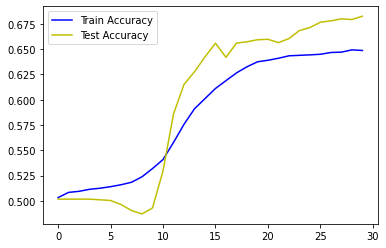

In [84]:
train_acc, = pplt.plot(log['train_accuracy'], label="Train Accuracy", color='b')
test_acc, = pplt.plot(log['test_accuracy'], label="Test Accuracy", color='y')
pplt.legend(handles = [train_acc, test_acc])

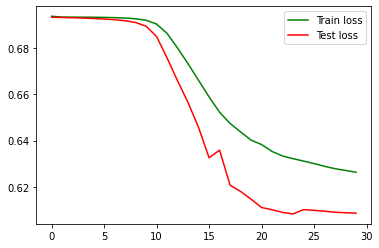

In [85]:
train_loss, = pplt.plot(log['train_loss'], label="Train loss", color='g')
test_loss, = pplt.plot(log['test_loss'], label="Test loss", color='r')
pplt.legend(handles = [train_loss, test_loss])

In [55]:
learn_rate_range = np.linspace(0, 1, 20)
print("this is the learning rate: {}".format(learn_rate_range))
learn_rate_holder = [learn_rate_range[0], 0.50]

print("learn rate before test: {}".format(learn_rate_holder))

EPOCHS = 5

for rate in learn_rate_range:
    network.set_training_param(loss = CrossEntropy(), lr = rate)
    log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER, print_results = False)
    print("learn rate is: {}".format(learn_rate_holder))
    if max(log['test_accuracy']) > learn_rate_holder[1]:
        learn_rate_holder = [rate, max(log['test_accuracy'])]
        
print("this is the best learning rate so far: {}".format(learn_rate_holder))

this is the learning rate: [0.         0.05263158 0.10526316 0.15789474 0.21052632 0.26315789
 0.31578947 0.36842105 0.42105263 0.47368421 0.52631579 0.57894737
 0.63157895 0.68421053 0.73684211 0.78947368 0.84210526 0.89473684
 0.94736842 1.        ]
learn rate before test: [0.0, 0.5]
learn rate is: [0.0, 0.5]
learn rate is: [0.0, 0.6681231003039514]
learn rate is: [0.0, 0.6681231003039514]
learn rate is: [0.0, 0.6681231003039514]
learn rate is: [0.0, 0.6681231003039514]
learn rate is: [0.0, 0.6681231003039514]
learn rate is: [0.0, 0.6681231003039514]
learn rate is: [0.0, 0.6681231003039514]
learn rate is: [0.0, 0.6681231003039514]
learn rate is: [0.0, 0.6681231003039514]
learn rate is: [0.0, 0.6681231003039514]
learn rate is: [0.0, 0.6681231003039514]
learn rate is: [0.0, 0.6681231003039514]
learn rate is: [0.0, 0.6681231003039514]
learn rate is: [0.0, 0.6681231003039514]
learn rate is: [0.0, 0.6681231003039514]
learn rate is: [0.0, 0.6681231003039514]
learn rate is: [0.0, 0.66812310

In [70]:
# Sample code for building and training a model
# learning rate is 10 times less than first try


INPUT_SHAPE = 1024
LEARNING_RATE = 0.0001
EPOCHS = 30
BATCH_SIZE = 32

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(n_neurons = 4, activation = Relu(), weight_initializer = 'uniform')
network.add_layer(n_neurons = 4, activation = Relu(), weight_initializer = 'uniform')
network.add_layer(n_neurons = 2, activation = Identical(), weight_initializer = 'uniform')
network.set_training_param(loss = CrossEntropy(), lr = LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 0.4984727443609023	Average Loss: 0.6932416024708485
	Test: Average Accuracy: 0.5396086626139818	Average Loss: 0.6931054362514183
Epoch 2:
	Train: Average Accuracy: 0.5004229323308271	Average Loss: 0.6931410996319651
	Test: Average Accuracy: 0.5583206686930091	Average Loss: 0.6929968928906965
Epoch 3:
	Train: Average Accuracy: 0.5074483082706767	Average Loss: 0.693060395848438
	Test: Average Accuracy: 0.5592705167173252	Average Loss: 0.692895270163938
Epoch 4:
	Train: Average Accuracy: 0.5143327067669173	Average Loss: 0.6929838589392946
	Test: Average Accuracy: 0.5550911854103344	Average Loss: 0.6927981094344853
Epoch 5:
	Train: Average Accuracy: 0.5236137218045113	Average Loss: 0.6929108665669528
	Test: Average Accuracy: 0.5530965045592705	Average Loss: 0.6927050364908727
Epoch 6:
	Train: Average Accuracy: 0.5273731203007519	Average Loss: 0.6928411658660704
	Test: Average Accuracy: 0.5570858662613982	Average Loss: 0.6926157576602721
Epoch 7:
	Train: A

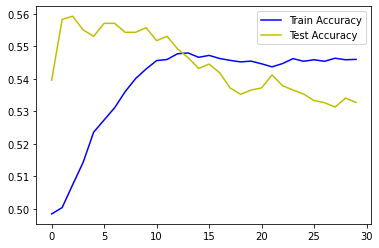

In [71]:
train_acc, = pplt.plot(log['train_accuracy'], label="Train Accuracy", color='b')
test_acc, = pplt.plot(log['test_accuracy'], label="Test Accuracy", color='y')
pplt.legend(handles = [train_acc, test_acc])

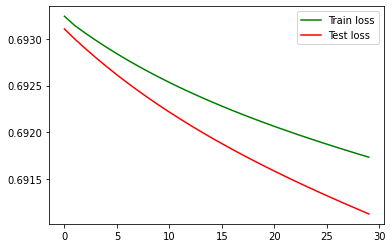

In [72]:
train_loss, = pplt.plot(log['train_loss'], label="Train loss", color='g')
test_loss, = pplt.plot(log['test_loss'], label="Test loss", color='r')
pplt.legend(handles = [train_loss, test_loss])

In [87]:
# Sample code for building and training a model
# learning rate is 10 times larger than first try

# Sample code for building and training a model

INPUT_SHAPE = 1024
LEARNING_RATE = 0.01
EPOCHS = 30
BATCH_SIZE = 32

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(n_neurons = 4, activation = Relu(), weight_initializer = 'uniform')
network.add_layer(n_neurons = 4, activation = Relu(), weight_initializer = 'uniform')
network.add_layer(n_neurons = 2, activation = Identical(), weight_initializer = 'uniform')
network.set_training_param(loss = CrossEntropy(), lr = LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 0.4930216165413534	Average Loss: 0.6952251274701153
	Test: Average Accuracy: 0.5016147416413373	Average Loss: 0.6936881682169781
Epoch 2:
	Train: Average Accuracy: 0.49443139097744365	Average Loss: 0.6950199065801795
	Test: Average Accuracy: 0.5016147416413373	Average Loss: 0.6936881682169781
Epoch 3:
	Train: Average Accuracy: 0.49443139097744365	Average Loss: 0.6950199065801795
	Test: Average Accuracy: 0.5016147416413373	Average Loss: 0.6936881682169781
Epoch 4:
	Train: Average Accuracy: 0.49443139097744365	Average Loss: 0.6950199065801795
	Test: Average Accuracy: 0.5016147416413373	Average Loss: 0.6936881682169781
Epoch 5:
	Train: Average Accuracy: 0.49443139097744365	Average Loss: 0.6950199065801795
	Test: Average Accuracy: 0.5016147416413373	Average Loss: 0.6936881682169781
Epoch 6:
	Train: Average Accuracy: 0.49443139097744365	Average Loss: 0.6950199065801795
	Test: Average Accuracy: 0.5016147416413373	Average Loss: 0.6936881682169781
Epoch 7:
	T

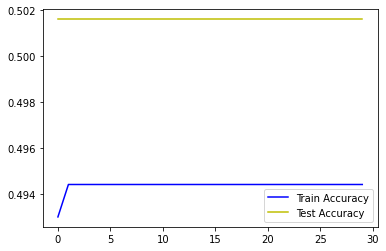

In [88]:
train_acc, = pplt.plot(log['train_accuracy'], label="Train Accuracy", color='b')
test_acc, = pplt.plot(log['test_accuracy'], label="Test Accuracy", color='y')
pplt.legend(handles = [train_acc, test_acc])

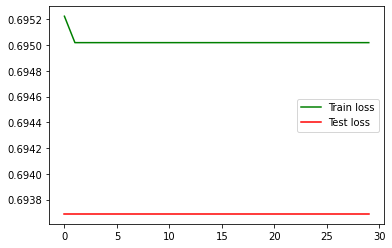

In [89]:
train_loss, = pplt.plot(log['train_loss'], label="Train loss", color='g')
test_loss, = pplt.plot(log['test_loss'], label="Test loss", color='r')
pplt.legend(handles = [train_loss, test_loss])

In [90]:
# test different activation functions

INPUT_SHAPE = 1024
LEARNING_RATE = 0.001
EPOCHS = 30
BATCH_SIZE = 32

TRAINLOADER = Dataloader(data = train_data_frame.values.tolist(), labels = train_labels['label'].values.tolist(),
                         n_classes = 2, batch_size = BATCH_SIZE, shuffle = False)
TESTLOADER = Dataloader(data = test_data_frame.values.tolist(), labels = test_labels['label'].values.tolist(),
                        n_classes = 2, batch_size = BATCH_SIZE, shuffle = False)

In [91]:
# sigmoid


network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(n_neurons = 4, activation = Sigmoid(), weight_initializer = 'uniform')
network.add_layer(n_neurons = 4, activation = Sigmoid(), weight_initializer = 'uniform')
network.add_layer(n_neurons = 2, activation = Identical(), weight_initializer = 'uniform')
network.set_training_param(loss = CrossEntropy(), lr = LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER, print_results = False)


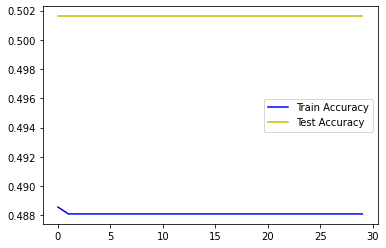

In [92]:
train_acc, = pplt.plot(log['train_accuracy'], label="Train Accuracy", color='b')
test_acc, = pplt.plot(log['test_accuracy'], label="Test Accuracy", color='y')
pplt.legend(handles = [train_acc, test_acc])

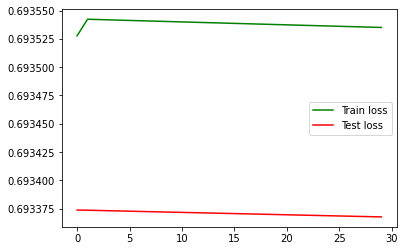

In [93]:
train_loss, = pplt.plot(log['train_loss'], label="Train loss", color='g')
test_loss, = pplt.plot(log['test_loss'], label="Test loss", color='r')
pplt.legend(handles = [train_loss, test_loss])

In [94]:
max_values = [max(log['train_accuracy']), max(log['train_loss']), max(log['test_accuracy']), max(log['test_loss'])]

print("Maximum values in each diagram are: \n train_acc: {} \n train_loss: {} \n test_acc: {} \n train_loss: {}".format(max_values[0],max_values[1],max_values[2],max_values[3]))

Maximum values in each diagram are: 
 train_acc: 0.4885573308270677 
 train_loss: 0.6935423055214439 
 test_acc: 0.5016147416413373 
 train_loss: 0.6933737603051517


In [96]:
# Tanh

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(n_neurons = 4, activation = Tanh(), weight_initializer = 'uniform')
network.add_layer(n_neurons = 4, activation = Tanh(), weight_initializer = 'uniform')
network.add_layer(n_neurons = 2, activation = Identical(), weight_initializer = 'uniform')
network.set_training_param(loss = CrossEntropy(), lr = LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER, print_results = False)



/tmp/ipykernel_122701/285069891.py:86: RuntimeWarning: overflow encountered in matmul
  backprop_tensor = np.matmul(backprop_mult, self.__weight.transpose())
/tmp/ipykernel_122701/3305472401.py:297: RuntimeWarning: overflow encountered in multiply
  return 1 - np.multiply(matrix, matrix)
/tmp/ipykernel_122701/285069891.py:83: RuntimeWarning: invalid value encountered in matmul
  weight_product = np.matmul(transpose_input_matrix, backprop_mult)
/tmp/ipykernel_122701/285069891.py:84: RuntimeWarning: invalid value encountered in matmul
  backprop_product = np.matmul(backprop_matrix, backprop_mult)


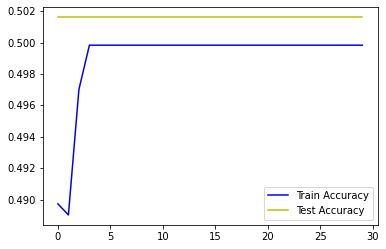

In [100]:
train_acc, = pplt.plot(log['train_accuracy'], label="Train Accuracy", color='b')
test_acc, = pplt.plot(log['test_accuracy'], label="Test Accuracy", color='y')
pplt.legend(handles = [train_acc, test_acc])

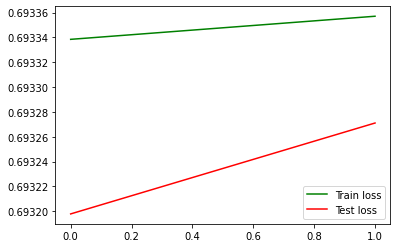

In [101]:
train_loss, = pplt.plot(log['train_loss'], label="Train loss", color='g')
test_loss, = pplt.plot(log['test_loss'], label="Test loss", color='r')
pplt.legend(handles = [train_loss, test_loss])

In [102]:
max_values = [max(log['train_accuracy']), max(log['train_loss']), max(log['test_accuracy']), max(log['test_loss'])]

print("Maximum values in each diagram are: \n train_acc: {} \n train_loss: {} \n test_acc: {} \n train_loss: {}".format(max_values[0],max_values[1],max_values[2],max_values[3]))

Maximum values in each diagram are: 
 train_acc: 0.49983552631578954 
 train_loss: 0.6933570698140448 
 test_acc: 0.5016147416413373 
 train_loss: 0.6932710588589622


In [103]:
# Leaky ReLU

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(n_neurons = 4, activation = LeakyRelu(), weight_initializer = 'uniform')
network.add_layer(n_neurons = 4, activation = LeakyRelu(), weight_initializer = 'uniform')
network.add_layer(n_neurons = 2, activation = Identical(), weight_initializer = 'uniform')
network.set_training_param(loss = CrossEntropy(), lr = LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER, print_results = False)


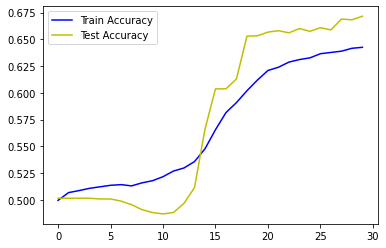

In [104]:
train_acc, = pplt.plot(log['train_accuracy'], label="Train Accuracy", color='b')
test_acc, = pplt.plot(log['test_accuracy'], label="Test Accuracy", color='y')
pplt.legend(handles = [train_acc, test_acc])

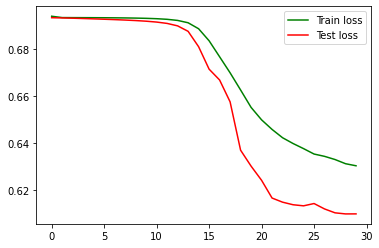

In [105]:
train_loss, = pplt.plot(log['train_loss'], label="Train loss", color='g')
test_loss, = pplt.plot(log['test_loss'], label="Test loss", color='r')
pplt.legend(handles = [train_loss, test_loss])

In [106]:
max_values = [max(log['train_accuracy']), max(log['train_loss']), max(log['test_accuracy']), max(log['test_loss'])]

print("Maximum values in each diagram are: \n train_acc: {} \n train_loss: {} \n test_acc: {} \n train_loss: {}".format(max_values[0],max_values[1],max_values[2],max_values[3]))

Maximum values in each diagram are: 
 train_acc: 0.6425516917293232 
 train_loss: 0.6938160016626426 
 test_acc: 0.6715425531914894 
 train_loss: 0.6931931356157522


In [ ]:
# checking batch size impact

In [ ]:
TRAINLOADER = Dataloader(data = train_data_frame.values.tolist(), labels = train_labels['label'].values.tolist(),
                         n_classes = 2, batch_size = BATCH_SIZE, shuffle = False)
TESTLOADER = Dataloader(data = test_data_frame.values.tolist(), labels = test_labels['label'].values.tolist(),
                        n_classes = 2, batch_size = BATCH_SIZE, shuffle = False)

In [107]:
# batch size = 16

INPUT_SHAPE = 1024
LEARNING_RATE = 0.001
EPOCHS = 30
BATCH_SIZE = 16

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(n_neurons = 4, activation = LeakyRelu(), weight_initializer = 'uniform')
network.add_layer(n_neurons = 4, activation = LeakyRelu(), weight_initializer = 'uniform')
network.add_layer(n_neurons = 2, activation = Identical(), weight_initializer = 'uniform')
network.set_training_param(loss = CrossEntropy(), lr = LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 0.4984257518796993	Average Loss: 0.6934856276749097
	Test: Average Accuracy: 0.5016147416413373	Average Loss: 0.6932022249811475
Epoch 2:
	Train: Average Accuracy: 0.5023026315789474	Average Loss: 0.6932701402556646
	Test: Average Accuracy: 0.5016147416413373	Average Loss: 0.6931519607771521
Epoch 3:
	Train: Average Accuracy: 0.508999060150376	Average Loss: 0.6932427480024351
	Test: Average Accuracy: 0.5016147416413373	Average Loss: 0.6930559892780499
Epoch 4:
	Train: Average Accuracy: 0.5104088345864662	Average Loss: 0.6932226610798196
	Test: Average Accuracy: 0.5016147416413373	Average Loss: 0.6929242953729287
Epoch 5:
	Train: Average Accuracy: 0.5122885338345865	Average Loss: 0.6932032162370562
	Test: Average Accuracy: 0.5016147416413373	Average Loss: 0.6927725446509235
Epoch 6:
	Train: Average Accuracy: 0.5133458646616542	Average Loss: 0.6931786665190435
	Test: Average Accuracy: 0.5002849544072948	Average Loss: 0.6926048369574913
Epoch 7:
	Train: 

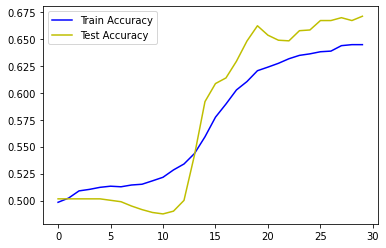

In [108]:
train_acc, = pplt.plot(log['train_accuracy'], label="Train Accuracy", color='b')
test_acc, = pplt.plot(log['test_accuracy'], label="Test Accuracy", color='y')
pplt.legend(handles = [train_acc, test_acc])

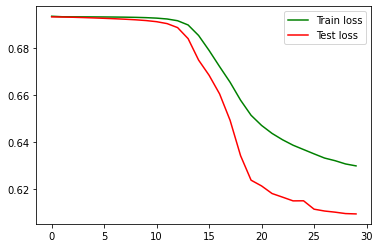

In [109]:
train_loss, = pplt.plot(log['train_loss'], label="Train loss", color='g')
test_loss, = pplt.plot(log['test_loss'], label="Test loss", color='r')
pplt.legend(handles = [train_loss, test_loss])

In [111]:
max_values = [max(log['train_accuracy']), max(log['train_loss']), max(log['test_accuracy']), max(log['test_loss'])]

print("Maximum values in each diagram are: \n train_acc: {} \n train_loss: {} \n test_acc: {} \n train_loss: {}".format(max_values[0],max_values[1],max_values[2],max_values[3]))

Maximum values in each diagram are: 
 train_acc: 0.6459586466165413 
 train_loss: 0.6935174052223896 
 test_acc: 0.6761968085106383 
 train_loss: 0.6931322626650259


In [110]:
# batch size = 16

INPUT_SHAPE = 1024
LEARNING_RATE = 0.001
EPOCHS = 30
BATCH_SIZE = 256

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(n_neurons = 4, activation = LeakyRelu(), weight_initializer = 'uniform')
network.add_layer(n_neurons = 4, activation = LeakyRelu(), weight_initializer = 'uniform')
network.add_layer(n_neurons = 2, activation = Identical(), weight_initializer = 'uniform')
network.set_training_param(loss = CrossEntropy(), lr = LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 0.5026550751879699	Average Loss: 0.6935174052223896
	Test: Average Accuracy: 0.5016147416413373	Average Loss: 0.6931322626650259
Epoch 2:
	Train: Average Accuracy: 0.5088815789473685	Average Loss: 0.6932092258106791
	Test: Average Accuracy: 0.5016147416413373	Average Loss: 0.6930089348188843
Epoch 3:
	Train: Average Accuracy: 0.5125234962406016	Average Loss: 0.693177085294213
	Test: Average Accuracy: 0.5016147416413373	Average Loss: 0.6928467375864438
Epoch 4:
	Train: Average Accuracy: 0.5136983082706768	Average Loss: 0.6931434802315823
	Test: Average Accuracy: 0.5002849544072948	Average Loss: 0.6926540137704921
Epoch 5:
	Train: Average Accuracy: 0.5139802631578947	Average Loss: 0.6930968102369485
	Test: Average Accuracy: 0.5009498480243161	Average Loss: 0.6924324331456098
Epoch 6:
	Train: Average Accuracy: 0.5151550751879699	Average Loss: 0.6930243488262067
	Test: Average Accuracy: 0.4956306990881459	Average Loss: 0.6921669316152269
Epoch 7:
	Train: 

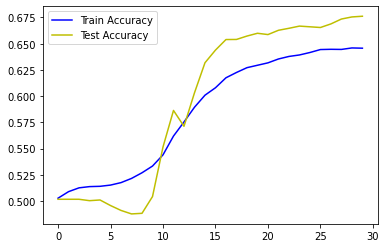

In [112]:
train_acc, = pplt.plot(log['train_accuracy'], label="Train Accuracy", color='b')
test_acc, = pplt.plot(log['test_accuracy'], label="Test Accuracy", color='y')
pplt.legend(handles = [train_acc, test_acc])

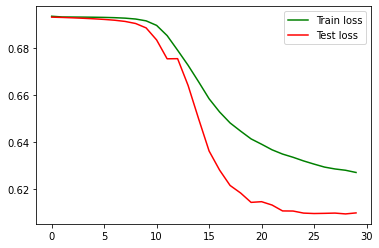

In [113]:
train_loss, = pplt.plot(log['train_loss'], label="Train loss", color='g')
test_loss, = pplt.plot(log['test_loss'], label="Test loss", color='r')
pplt.legend(handles = [train_loss, test_loss])

In [114]:
max_values = [max(log['train_accuracy']), max(log['train_loss']), max(log['test_accuracy']), max(log['test_loss'])]

print("Maximum values in each diagram are: \n train_acc: {} \n train_loss: {} \n test_acc: {} \n train_loss: {}".format(max_values[0],max_values[1],max_values[2],max_values[3]))

Maximum values in each diagram are: 
 train_acc: 0.6459586466165413 
 train_loss: 0.6935174052223896 
 test_acc: 0.6761968085106383 
 train_loss: 0.6931322626650259
